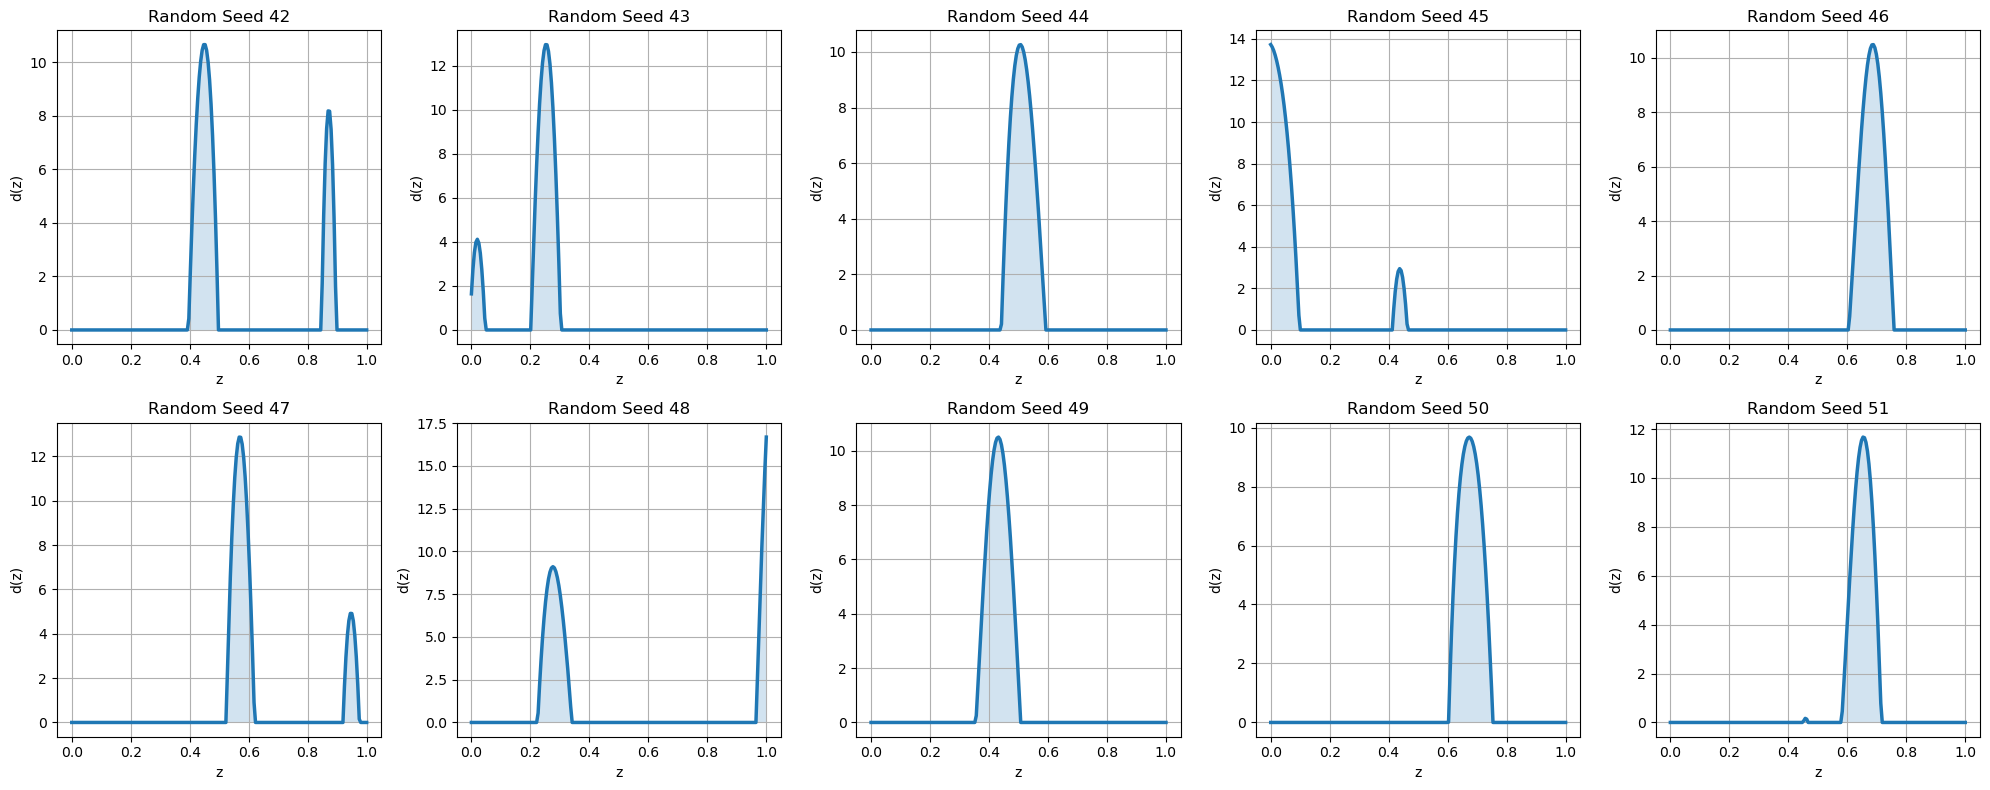

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

# 3. Set up subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows × 5 columns
axes = axes.flatten()

# 4. Generate and plot GP samples for different seeds

i, seed = 0, 42
while i < 10:
    
    X = np.linspace(0, 1, 200).reshape(-1, 1)
    kernel = RBF(length_scale=0.1)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10)
    samples = gp.sample_y(X, n_samples=1, random_state=seed) 
    
    samples -= np.percentile(samples, 85, axis=0, keepdims=True)        
    samples = (samples + np.abs(samples)) / 2
    samples = samples / np.trapezoid(samples, X, axis=0)
    
    
    ax = axes[i]
    
    for j in range(samples.shape[1]):
        
        if i == 9 and j == 1:
            pass
        else:
            ax.plot(X, samples[:, j], label=f"Sample {j+1}", linewidth=2.5)
            ax.fill_between(X[:,0], samples[:, j], label=f"Sample {j+1}", alpha=0.2)
    ax.set_xlabel("z")
    ax.set_ylabel("d(z)")
    ax.set_title(f"Random Seed {seed}")
    ax.grid(True)
    
    i += 1
    
    seed += 1

plt.tight_layout()
#plt.suptitle("GP Samples with Matern Kernel (ν=2.0) for 10 Seeds", y=1.02, fontsize=16)
plt.show()
